In [1]:
niter = 10

In [2]:
%autoreload 2
import ajcs
import sqra
import optim
import matplotlib.pyplot as plt
import numpy as np

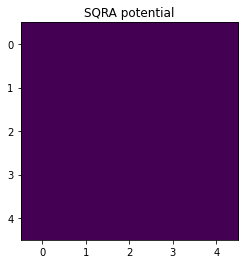

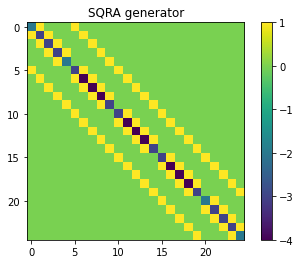

In [3]:
nx = 5
ny = 5


U = np.zeros((ny,nx))
s = sqra.sqra2d(U)
s.plot()

In [4]:
nt = 3
dt = 1
ts = ([dt] * nt)

o=optim.SqraOptim(s, ts, penalty = 0.001, nonautonomous=True)

In [5]:
%time o.optimize(niter)

CPU times: user 23.9 s, sys: 223 ms, total: 24.2 s
Wall time: 37 s


 final_simplex: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([-0.01652403, -0.01652389, -0.01652384, -0.01652384, -0.01652384,
       -0.01652384, -0.01652381, -0.01652381, -0.01652381, -0.01652381,
       -0.0165238 , -0.0165238 , -0.0165238 , -0.0165238 , -0.01652378,
       -0.01652378, -0.01652378, -0.01652378, -0.01652377, -0.01652377,
       -0.01652377, -0.01652377, -0.01652377, -0.01652377, -0.01652377,
       -0.01652377, -0.01652373, -0.01652373, -0.01652373, -0.01652373,
       -0.01652373, -0.0165237 , -0.0165237 , -0.0165237 , -0.0165237 ,
       -0.01652367, -0.01652367, -0.01652367, -0.01652367, -0.01652367,
       -0.01652366, -0.01652364, -0.01652364, -0.01652364, -0.01652364,
       -0.01652363, -0.01652363, -0.01652363, -0.01652363, -0.01652361,
       -0.01652361, -

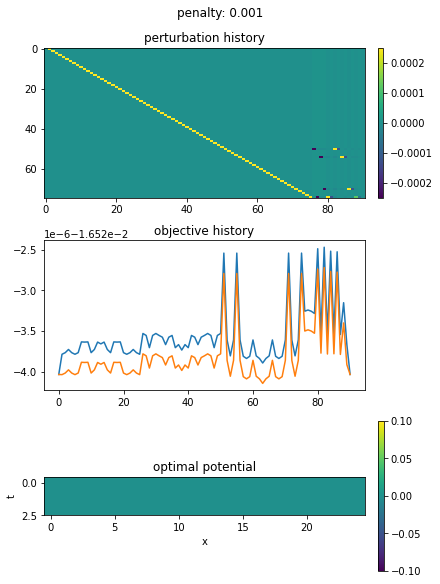

In [6]:
o.plot()

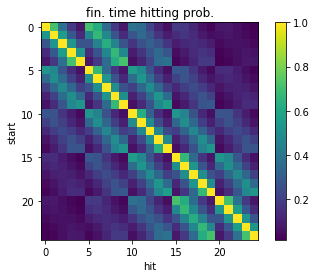

In [7]:
o.plot_fin_hit_prob()

## Result
As expected, no perturbation is necessary for optimal coverage

# Potential Barrier

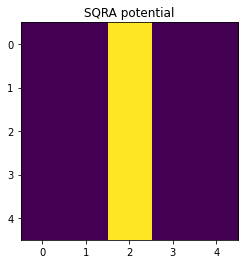

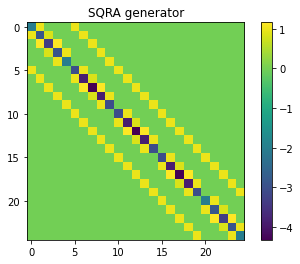

In [72]:
U_p = U.copy()
U_p[:,2] = 0.3
s_p = sqra.sqra2d(U_p)
s_p.plot()

In [9]:
o_p=optim.SqraOptim(s_p, ts, penalty = 0.0001)

In [10]:
%time o_p.optimize(niter)

CPU times: user 23 s, sys: 843 ms, total: 23.9 s
Wall time: 30.3 s


 final_simplex: (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([-0.01638553, -0.0163855 , -0.0163855 , -0.01638549, -0.01638549,
       -0.01638547, -0.01638547, -0.01638547, -0.01638547, -0.01638546,
       -0.01638546, -0.01638546, -0.01638546, -0.01638546, -0.01638543,
       -0.01638543, -0.01638543, -0.01638543, -0.01638542, -0.01638542,
       -0.01638542, -0.01638542, -0.01638542, -0.01638542, -0.01638542,
       -0.01638542, -0.01638542, -0.01638538, -0.01638538, -0.01638538,
       -0.01638537, -0.01638537, -0.01638536, -0.01638535, -0.01638535,
       -0.01638535, -0.01638535, -0.01638535, -0.01638535, -0.01638533,
       -0.01638533, -0.01638531, -0.0163853 , -0.0163853 , -0.0163853 ,
       -0.0163853 , -0.0163853 , -0.0163853 , -0.0163853 , -0.0163853 ,
       -0.01638529, -

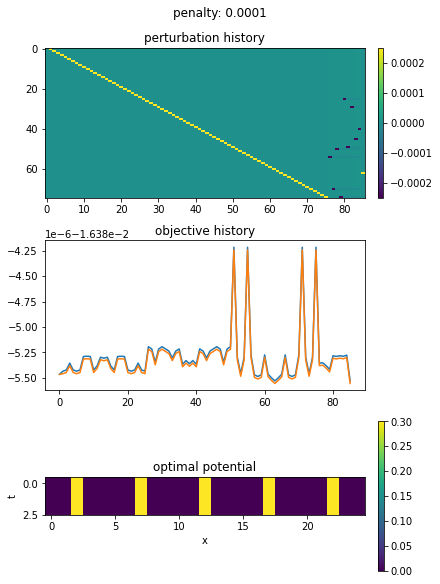

In [11]:
o_p.plot()

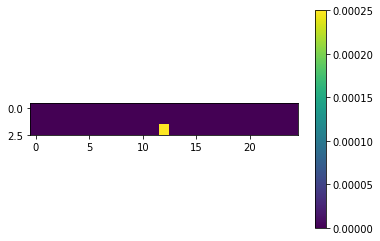

In [12]:
o_p.plot_perturbation()

# Entropic Barrier

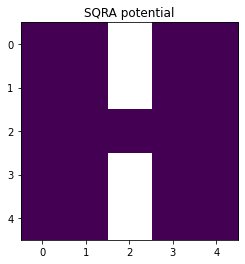

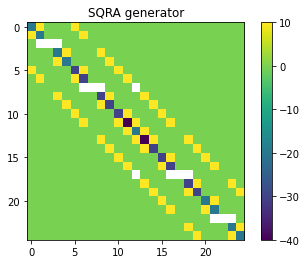

In [13]:
U_h = U.copy()
U_h[:,2] = np.inf
U_h[2,2] = 0
s_h = sqra.sqra2d(U_h, phi=10)
s_h.plot()

In [14]:
o_h=optim.SqraOptim(s_h, ts, penalty = 0.001)

CPU times: user 256 ms, sys: 3.48 ms, total: 259 ms
Wall time: 353 ms


-0.016524032890056883

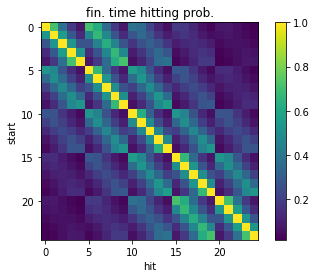

In [15]:
%time o.plot_fin_hit_prob()
o.objective(o.x)

In [16]:
o.simplex=None
o.adaptive=True
%time o_h.optimize(niter);

CPU times: user 1min 5s, sys: 1.98 s, total: 1min 7s
Wall time: 1min 24s


 final_simplex: (array([[ 1.00000000e-05,  1.00000000e-05,  1.00000000e-05, ...,
         1.00000000e-05,  1.00000000e-05,  1.00000000e-05],
       [ 7.70300052e-06,  7.70300052e-06,  7.70300052e-06, ...,
         7.70300052e-06,  7.70300052e-06, -5.80811059e-06],
       [ 8.11930491e-06,  8.11930491e-06,  8.11930491e-06, ...,
         8.11930491e-06,  8.11930491e-06, -6.12200670e-06],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]), array([-0.40927797, -0.4092681 , -0.40926728, -0.40926698, -0.40926509,
       -0.40926189, -0.40926164, -0.40926164, -0.40926164, -0.40926164,
       -0.40926164, -0.40926164, -0.40926164, -0.40926164, -0.40926164,
       -0

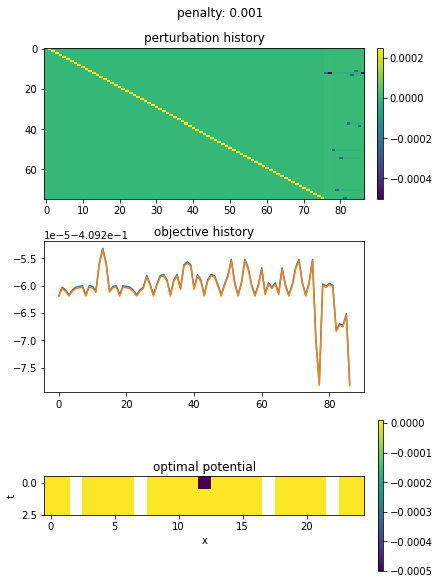

In [17]:
o_h.plot()

In [18]:
o_h.objective(np.zeros_like(o_h.x))

-0.4092618863429995

In [19]:
o_h.objective(o_h.x)

-0.4092792072706748

In [20]:
o_h.penaltyfunction(o_h.x)

1.2400000000000002e-06

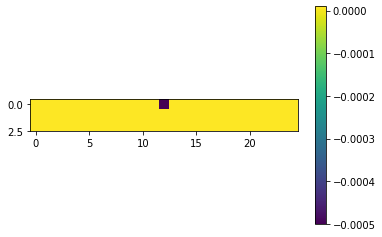

In [21]:
o_h.plot_perturbation()

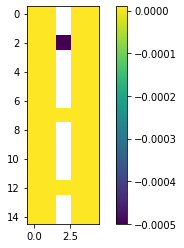

In [22]:
plt.imshow(np.vstack([x for x in o_h.x.reshape(3,5,5) + 0 * o_h.sqra.u.reshape(5,5)]))
plt.colorbar()

# Experimental

In [23]:
%connect_info

{
  "shell_port": 9087,
  "iopub_port": 9089,
  "stdin_port": 9088,
  "control_port": 9086,
  "hb_port": 9085,
  "ip": "127.0.0.1",
  "key": "a8b36c1c-fdbe-4dbd-bf53-d7deba0cacbf",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing /var/folders/f1/lgdx8nc94yg_11x4fhdkpck00000gn/T/tmp-2210823KIs552zpn.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [67]:
import ode
Qs = [s_p.Q] * 3
us = [s_p.u] * 3
dts = [1,1,1]
hpa = ode.finite_time_hitting_prob_adjoint(Qs, dts, us, nquad=100)

In [53]:
hp1 = hpa.finite_time_hitting_probs()

In [54]:
hp2 = ode.finite_time_hitting_probs(Qs, dts)
np.max(np.abs(hp1-hp2))

2.0876343986842016e-09

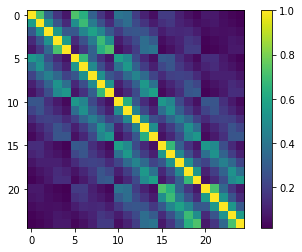

In [55]:
plt.imshow(hp1)
plt.colorbar()

In [62]:
o, du = hpa.min_and_derivative()
o

0.016385464402537332

In [66]:
hpa.activei, hpa.activej

(24, 0)

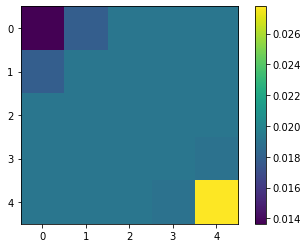

In [63]:
plt.imshow(du.reshape(nx,ny))
plt.colorbar()

In [158]:
sp = s_p.perturbed_copy(np.ones(25))

In [ ]:
sp = s_p.perturbed_copy()

In [123]:
ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad=100)

0.016523503214520154
0.01644251643951651
0.016523561994866324
0.01644174162901992
0.01652314117651878
0.016442150730722204
0.016523463097902286
0.01644167645660027
0.016522928065518885
0.016441971332509072


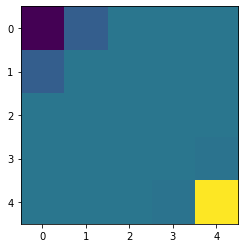

In [218]:
for i in range(10):
    ap = ode.finite_time_hitting_prob_adjoint([sp.Q]*3, dts, [sp.u]*3, nquad =100)
    m, d = ap.min_and_derivative()
    sp = sp.perturbed_copy(d*1)
    print(m)
    plt.imshow(d.reshape((5,5)))


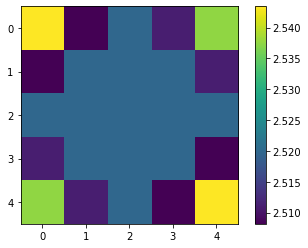

In [219]:
plt.imshow(sp.u)
plt.colorbar()

In [220]:
sum(sp.u)

array([12.62034262, 12.57918135, 12.59979571, 12.57918135, 12.6203426 ])

In [221]:
1e-6

[autoreload of ode failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap

1e-06

In [229]:
np.sign([1,2]) * np.array([4,5])

array([4, 5])

In [225]:
np.maximum(1,2)

2

In [341]:
problem = ode.Problem(s_p, [3])

In [351]:
problem.obj(np.zeros(25))

0.01652403236232746


(-0.01652403236232746,
 array([-0.01365254, -0.01795853, -0.01927575, -0.01927639, -0.01927639,
        -0.01795853, -0.01927523, -0.01927639, -0.01927639, -0.01927639,
        -0.01927575, -0.01927639, -0.01927639, -0.01927639, -0.01927802,
        -0.01927639, -0.01927639, -0.01927639, -0.01927948, -0.01907624,
        -0.01927639, -0.01927639, -0.01927802, -0.01907624, -0.02793236]))

In [352]:
rprop = ode.Rprop(lambda x: problem.obj(x)[1], np.random.rand(25)/100)

0.01351844352848978


In [353]:
rprop.run(10)
rprop.g

0.01351844352848978
0.013518443528489764
0.013518443528489856
0.013518443528489842
0.013518443528489741
0.013518443528489788
0.01351844352848984
0.013518443528489783
0.013518443528489769
0.013518443528489816


array([6.19173642, 6.19173642, 6.19173642, 6.19173642, 6.19173642,
       6.19173642, 6.19173642, 6.19173642, 6.19173642, 6.19173642,
       6.19173642, 6.19173642, 6.19173642, 6.19173642, 6.19173642,
       6.19173642, 6.19173642, 6.19173642, 6.19173642, 6.19173642,
       6.19173642, 6.19173642, 6.19173642, 6.19173642, 6.19173642])

In [349]:
rprop.x

array([224.46255462, 224.34521309, 224.97096126, 224.6204138 ,
       224.1687254 , 224.60497739, 224.92491796, 224.22839416,
       224.5592865 , 224.37583975, 224.94725855, 224.14167669,
       224.92020194, 224.64474329, 224.07344738, 224.84650308,
       224.74292807, 224.97714542, 224.62725654, 224.86549965,
       224.31706518, 225.02230163, 224.21835682, 224.12542647,
       224.96122551])

In [350]:
problem.obj(rprop.x)

(-0.012798219264312353,
 array([-0.01999531, -0.01312953, -0.01329046, -0.01328939, -0.01328939,
        -0.01313807, -0.01329152, -0.01328939, -0.01328939, -0.01328939,
        -0.01329056, -0.01328939, -0.01328939, -0.01328939, -0.01328881,
        -0.01328939, -0.01328939, -0.01328939, -0.01328857, -0.01238266,
        -0.01328939, -0.01328939, -0.01328889, -0.01213179, -0.00895653]))

In [347]:
problem.s.u

array([[32.58737361, 32.47003208, 33.09578025, 32.74523279, 32.29354439],
       [32.72979638, 33.04973695, 32.35321315, 32.68410549, 32.50065873],
       [33.07207754, 32.26649568, 33.04502092, 32.76956228, 32.19826636],
       [32.97132207, 32.86774706, 33.10196441, 32.75207553, 32.99031863],
       [32.44188416, 33.14712062, 32.3431758 , 32.25024546, 33.0860445 ]])